In [150]:
from skimage import io, data, filters, feature
from skimage.util import crop
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import distance_transform_edt
import timeit

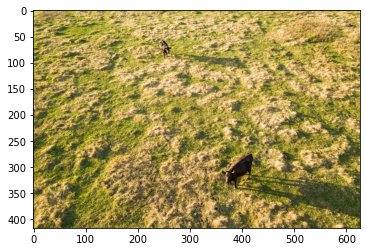

In [154]:
img = io.imread("cows.jpg", plugin="matplotlib")
plt.imshow(img)

In [123]:
img.shape

(417, 626, 3)

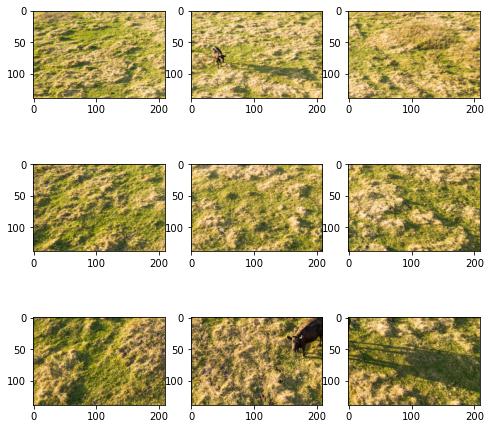

In [124]:
# splits an image into n by n subimages
# returns an array of images
def split_image(img, n):
    x_len = img.shape[1]
    y_len = img.shape[0]
    x_interval = x_len/n
    y_interval = y_len/n

    cropped_images = []
    i = 0
    while (i < y_len):
        j = 0
        while (j < x_len):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            cropped = img[y1:y2,x1:x2]
            cropped_images.append(cropped)
            j += x_interval
        i += y_interval
        
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, len(cropped_images) + 1):
        img = cropped_images[i - 1]
        fig.add_subplot(n, n, i)
        plt.imshow(img)
    plt.show()
    return cropped_images

n = 3
n_by_n_images = split_image(img, n)

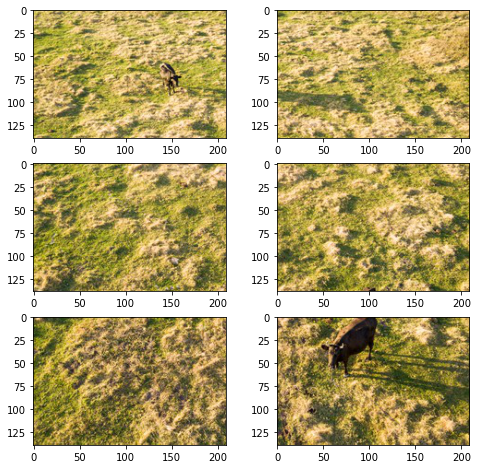

In [125]:
# splits an image into (n-1) by (n-1) subimages for the x overlap
# returns an array of images
def split_image_x_overlap(img, n):
    x_len = img.shape[1]
    y_len = img.shape[0]
    x_interval = x_len/n
    y_interval = y_len/n

    cropped_images = []
    i = 0
    while (i < y_len):
        j = x_interval/2
        while (j < x_len - x_interval/2):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            #print(x1, y1, x2, y2)
            cropped = img[y1:y2,x1:x2]
            cropped_images.append(cropped)
            j += x_interval
        i += y_interval
        
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, len(cropped_images) + 1):
        img = cropped_images[i - 1]
        fig.add_subplot(n, n - 1, i)
        plt.imshow(img)
    plt.show()
    return cropped_images

n = 3
x_overlap_images = split_image_x_overlap(img, n)

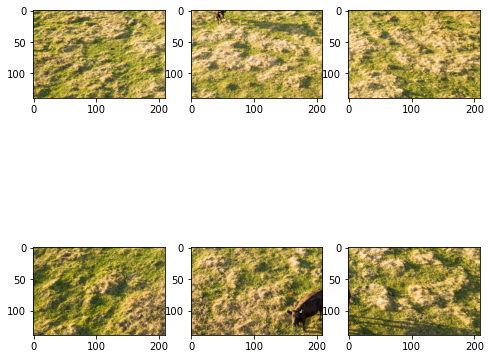

In [126]:
# splits an image into (n-1) by (n-1) subimages for the y overlap
# returns an array of images
def split_image_y_overlap(img, n):
    x_len = img.shape[1]
    y_len = img.shape[0]
    x_interval = x_len/n
    y_interval = y_len/n
    
    cropped_images = []
    i = y_interval/2
    while (i < y_len - y_interval/2):
        j = 0
        while (j < x_len):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            #print(x1, y1, x2, y2)
            cropped = img[y1:y2,x1:x2]
            cropped_images.append(cropped)
            j += x_interval
        i += y_interval
        
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, len(cropped_images) + 1):
        img = cropped_images[i - 1]
        fig.add_subplot(n - 1, n, i)
        plt.imshow(img)
    plt.show()
    return cropped_images

n = 3
y_overlap_images = split_image_y_overlap(img, n)

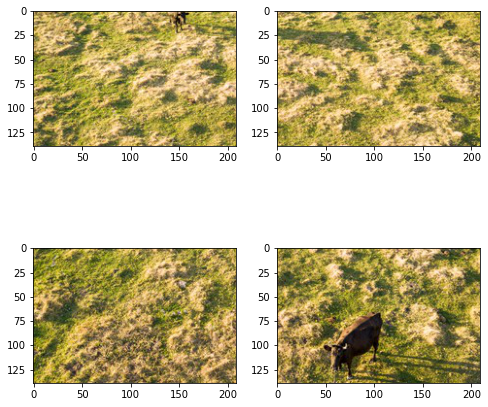

In [127]:
# splits an image into (n-1) by (n-1) subimages for the x and y overlap
# returns an array of images
def split_image_xy_overlap(img, n):
    x_len = img.shape[1]
    y_len = img.shape[0]
    x_interval = x_len/n
    y_interval = y_len/n

    cropped_images = []
    i = y_interval/2
    while (i < y_len - y_interval/2):
        j = x_interval/2
        while (j < x_len - x_interval/2):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            # print(x1, y1, x2, y2)
            cropped = img[y1:y2,x1:x2]
            cropped_images.append(cropped)
            j += x_interval
        i += y_interval
        
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, len(cropped_images) + 1):
        img = cropped_images[i - 1]
        fig.add_subplot(n - 1, n - 1, i)
        plt.imshow(img)
    plt.show()
    return cropped_images

n = 3
xy_overlap_images = split_image_xy_overlap(img, n)

In [155]:
def split_image_all(img, n):
    x_len = img.shape[1]
    y_len = img.shape[0]
    x_interval = x_len/n
    y_interval = y_len/n
    
    sub_images = []
    # n by n subimages
    i = 0
    while (i < y_len):
        j = 0
        while (j < x_len):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            cropped = img[y1:y2,x1:x2]
            sub_images.append(cropped)
            j += x_interval
        i += y_interval
        
    # images in x overlap (n-1) * (n)
    second_splice = []
    i = 0
    while (i < y_len):
        j = x_interval/2
        while (j < x_len - x_interval/2):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            #print(x1, y1, x2, y2)
            cropped = img[y1:y2,x1:x2]
            sub_images.append(cropped)
            j += x_interval
        i += y_interval
        
    # images in y overlap (n) * (n-1)
    thrid_splice = []
    i = y_interval/2
    while (i < y_len - y_interval/2):
        j = 0
        while (j < x_len):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            #print(x1, y1, x2, y2)
            cropped = img[y1:y2,x1:x2]
            sub_images.append(cropped)
            j += x_interval
        i += y_interval
        
    # images in x, y overlap (n-1) * (n-1)
    fourth_splice = []
    i = y_interval/2
    while (i < y_len - y_interval/2):
        j = x_interval/2
        while (j < x_len - x_interval/2):
            x1 = round(j)
            y1 = round(i)
            x2 = x1 + round(x_interval)
            y2 = y1 + round(y_interval)
            # print(x1, y1, x2, y2)
            cropped = img[y1:y2,x1:x2]
            sub_images.append(cropped)
            j += x_interval
        i += y_interval
    return sub_images
        
n = 3
sub_images = split_image_all(img, n)
len(sub_images)

25

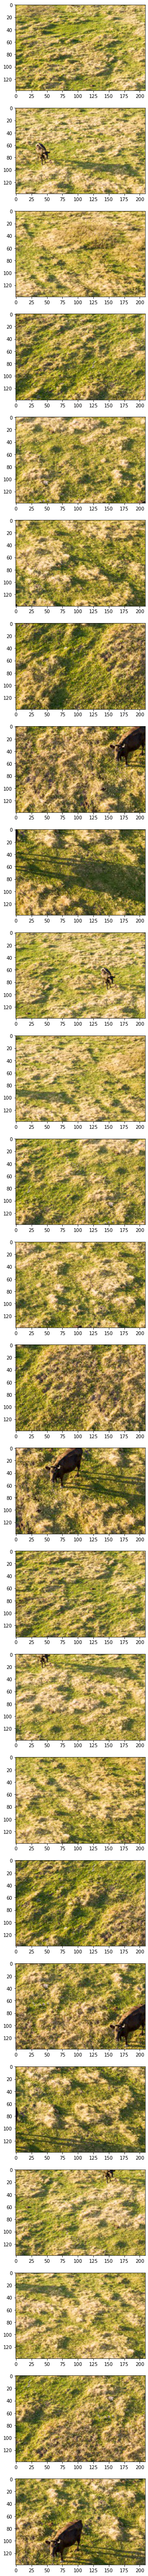

In [156]:
# display subimages
fig=plt.figure(figsize=(100, 100))
for i in range(1, len(sub_images) + 1):
    sub_image = sub_images[i - 1]
    fig.add_subplot(len(sub_images), 1, i)
    plt.imshow(sub_image)
plt.show()